<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

C:\Users\David\AppData\Local\Temp\ipykernel_12128\2034387353.py:27: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series,1).stack()


popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
release_year        int64
vote_average      float64
vote_count          int64
profit              int64
genres_split       object
dtype: object


NameError: name 'movies_counted' is not defined

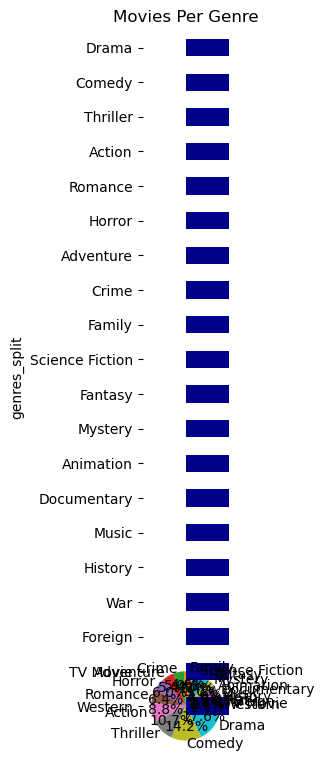

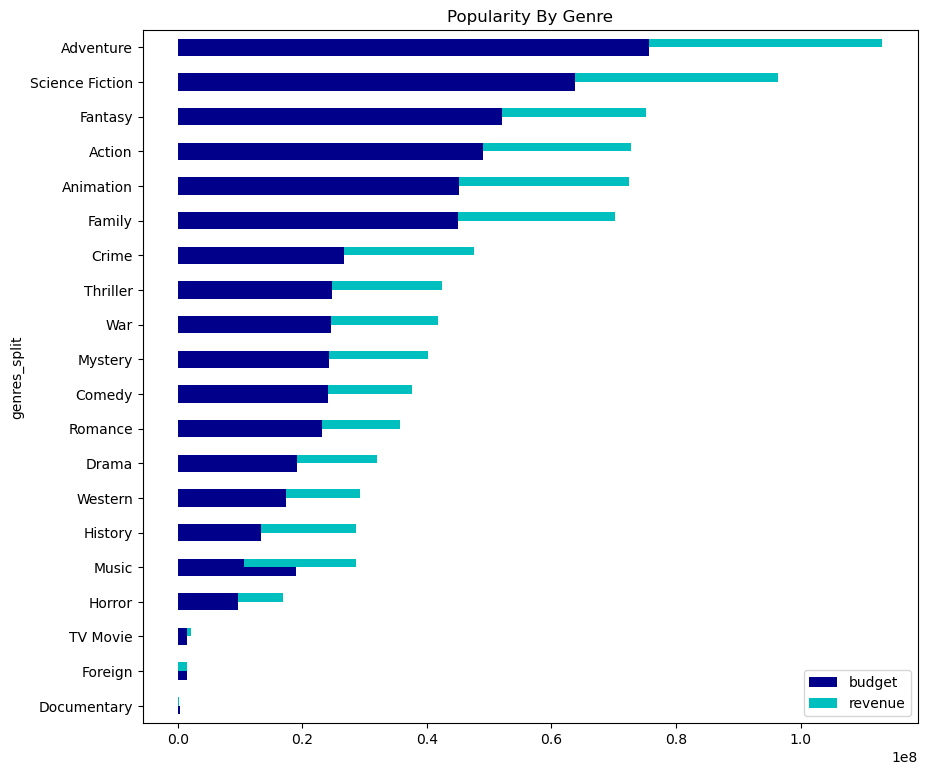

In [7]:
import pandas as pd

pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 22)


movies = pd.read_csv(r'C:\Users\David\OneDrive\DAVID PHYTON FILE\imdb_movies.csv')

movies.head()

movies.info()

movies.drop_duplicates(inplace = True)

movies[movies.duplicated()]

movies.dropna(subset = ['genres'],inplace= True)

movies['profit'] = movies['revenue'] - movies['budget']

movies_genre = movies[['popularity', 'budget', 'revenue', 'genres', 'original_title', 'runtime', 'release_year', 'vote_average', 'vote_count', 'profit']]

from pandas import Series, DataFrame

movies_genre.head()

split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)

import pandas as pd

# Assuming movies_genre is your DataFrame
split = movies_genre['genres'].str.split('|', expand=True).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)
movies_genre


genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = True)

genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct = '%1.1f%%', figsize = (10,10))

genres_count['original_title'].plot.barh(title = 'Movies Per Genre', color = 'DarkBlue', figsize = (10,9) )

print(movies_genre.dtypes)

genres_avg = movies_genre.groupby('genres_split')[['profit', 'budget', 'revenue', 'vote_average', 'vote_count', 'runtime', 'popularity' ]].mean()
pd.options.display.float_format = '{:2f}'.format

genres_avg.sort_values('revenue', ascending = True, inplace = True)

genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget and Revenue By Genre', color = ('DarkBlue', 'c'), figsize = (10,9) )

genres_avg.sort_values('profit', ascending = True, inplace = True)

genres_avg['profit'].plot.barh(title = 'Profit By Genre', color = 'DarkBlue', figsize = (10,9) )

genres_avg.sort_values('popularity', ascending = True, inplace = True)

genres_avg['popularity'].plot.barh(title = 'Popularity By Genre', color = 'DarkBlue', figsize = (10,9) )


import seaborn as sns
sns.regplot(x = 'vote_average', y = 'profit', data = movies_counted, line_kws= {"color": 'red'})

sns.regplot(x = 'vote_average', y = 'revenue', data = movies_counted, line_kws= {"color": 'red'})


import matplotlib.pyplot as plt
sns.regplot(x = 'popularity', y = 'revenue', data = movies_counted, line_kws= {"color": 'red'})
plt.figure(figsize = (10,5))
plt.show()


movies_counted.plot.scatter(x = 'budget', y = 'profit')
genres_avg 


import matplotlib.pyplot as plt
sns.regplot(x = 'budget', y = 'profit', data = movies_counted, line_kws= {"color": 'red'})
plt.figure(figsize = (10,5))
plt.show()


time_genre = pd.DataFrame(movies_genre.groupby(['release_year', 'genres_split'])['profit'].mean())

final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns =['release_year'])

sns.set(rc = {'figure.figsize':(15,10) })
sns.heatmap(final_genre, cmap = 'YlGnBu', linewidths = .5)
plt.title('Genre by Profit per Year')